[View in Colaboratory](https://colab.research.google.com/github/duakaran96/Balance-Scale-Tip-Classifier/blob/master/Balance_Scale_Data.ipynb)

# Classify position of Balance Scale

The aim of our project is to classify the position of Balance Scale based off the [Balance Scale Data Set](http://archive.ics.uci.edu/ml/datasets/balance+scale)  from [UCI  ML Repository](http://archive.ics.uci.edu/ml/index.php)

We will use **Tree** methods under *scikit-learn* for the classification task.

## Data Set Information:

This data set was generated to model psychological experimental results. Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced. The attributes are the left weight, the left distance, the right weight, and the right distance. The correct way to find the class is the greater of (left-distance \* left-weight) and (right-distance \* right-weight). If they are equal, it is balanced.

## Attribute information:

1. Class Name: 3 (L, B, R)             {' L' : Left, 'B' : Balanced, 'R' : Right}
2. Left-Weight: 5 (1, 2, 3, 4, 5) 
3. Left-Distance: 5 (1, 2, 3, 4, 5) 
4. Right-Weight: 5 (1, 2, 3, 4, 5) 
5. Right-Distance: 5 (1, 2, 3, 4, 5)



## Imports

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the dataset

In [0]:
df  = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data', header=None, names=['Class Name', 'Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'])

We'll take a look at the first 5 rows of our dataset by using pandas *head* function

In [19]:
df.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [57]:
print('Shape of our dataset')
df.shape

Shape of our dataset


(625, 5)

In [58]:
print('Size of our dataset')
df.size

Size of our dataset


3125

In [77]:
print('Here\'s the information about our DataFrame including the index dtype and column dtypes, non-null values and memory usage')
df.info()

Here's the information about our DataFrame including the index dtype and column dtypes, non-null values and memory usage
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
Class Name        625 non-null object
Left-Weight       625 non-null int64
Left-Distance     625 non-null int64
Right-Weight      625 non-null int64
Right-Distance    625 non-null int64
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [60]:
print('Statistical description of our dataset')
df.describe(include='all')

Statistical description of our dataset


,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
count,625,625.000000,625.000000,625.000000,625.000000
unique,3,NaN,NaN,NaN,NaN
top,L,NaN,NaN,NaN,NaN
freq,288,NaN,NaN,NaN,NaN
mean,NaN,3.000000,3.000000,3.000000,3.000000
std,NaN,1.415346,1.415346,1.415346,1.415346
min,NaN,1.000000,1.000000,1.000000,1.000000
25%,NaN,2.000000,2.000000,2.000000,2.000000
50%,NaN,3.000000,3.000000,3.000000,3.000000
75%,NaN,4.000000,4.000000,4.000000,4.000000


Below we have plotted a **countplot** of different positions our balance-scale is in:

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


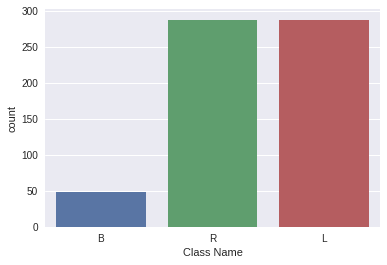

In [14]:
sns.countplot(df['Class Name'])

We see here that most of the times either the scale is in *left* or *right* state. Very few cases are there in which the scale is *balanced.*

We'll separate the features and target from our dataset into X and y.

X contains all of the features 

y contains the target

In [0]:
X = df.drop(['Class Name'], axis=1)

In [0]:
y = df['Class Name']

In [24]:
print(X.shape)
print(y.shape)

(625, 4)
(625,)


## Train Test Split

Splitting the data in training set which our model will be trained on, and testing set that our model will be tested on by making predictions.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [31]:
print(X_train.shape)
print(X_test.shape)

(375, 4)
(250, 4)


## Building and Training our Decision Tree Model

In [0]:
from sklearn.tree import DecisionTreeClassifier

### *gini* index as criterion

In [0]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini')

In [35]:
giniDecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predictions and Evaluation

In [0]:
giniPred = giniDecisionTree.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score, classification_report

In [61]:
print('Accuracy Score: ',accuracy_score(y_test, giniPred))

Accuracy Score:  0.748


In [62]:
print('Classification Report')
print(classification_report(y_test, giniPred))

Classification Report
             precision    recall  f1-score   support

          B       0.00      0.00      0.00        24
          L       0.84      0.81      0.83       107
          R       0.83      0.84      0.83       119

avg / total       0.75      0.75      0.75       250



### *entropy* as criterion

In [0]:
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy')

In [40]:
entropyDecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predictions and Evaluation

In [0]:
entropyPred = entropyDecisionTree.predict(X_test)

In [63]:
print('Accuracy Score: ',accuracy_score(y_test, entropyPred))

Accuracy Score:  0.748


In [54]:
print(classification_report(y_test, entropyPred))

             precision    recall  f1-score   support

          B       0.00      0.00      0.00        24
          L       0.84      0.82      0.83       107
          R       0.85      0.83      0.84       119

avg / total       0.76      0.75      0.76       250



## Using ensemble models

# RandomForest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

### *gini* index as criterion

In [0]:
giniForest = RandomForestClassifier(criterion='gini')

In [45]:
giniForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Predictions and Evaluation

In [0]:
giniForestPred = giniForest.predict(X_test)

In [64]:
print('Accuracy Score: ',accuracy_score(y_test, giniForestPred))

Accuracy Score:  0.8


In [55]:
print(classification_report(y_test, giniForestPred))

             precision    recall  f1-score   support

          B       0.08      0.04      0.05        24
          L       0.77      0.90      0.83       107
          R       0.92      0.87      0.89       119

avg / total       0.77      0.80      0.78       250



### *entropy* as criterion

In [0]:
entropyForest = RandomForestClassifier(criterion='entropy')

In [49]:
entropyForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Predictions and Evaluation

In [0]:
entropyForestPred = entropyForest.predict(X_test)

In [65]:
print('Accuracy Score: ',accuracy_score(y_test, entropyForestPred))

Accuracy Score:  0.772


In [56]:
print(classification_report(y_test, entropyForestPred))

             precision    recall  f1-score   support

          B       0.05      0.04      0.04        24
          L       0.82      0.85      0.83       107
          R       0.86      0.85      0.85       119

avg / total       0.76      0.77      0.77       250



# ExtraTree Classifier

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

### *gini* index as criterion

In [0]:
giniExtra = ExtraTreesClassifier(criterion='gini')

In [68]:
giniExtra.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Predictions and Evaluation

In [0]:
giniExtraPred = giniExtra.predict(X_test)

In [70]:
print('Accuracy Score: ',accuracy_score(y_test, giniExtraPred))

Accuracy Score:  0.808


In [71]:
print(classification_report(y_test, giniExtraPred))

             precision    recall  f1-score   support

          B       0.00      0.00      0.00        24
          L       0.82      0.88      0.85       107
          R       0.89      0.91      0.90       119

avg / total       0.77      0.81      0.79       250



### *entropy* as criterion

In [0]:
entropyExtra = ExtraTreesClassifier(criterion='entropy')

In [73]:
entropyExtra.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Predictions and Evaluation

In [0]:
entropyExtraPred = entropyExtra.predict(X_test)

In [75]:
print('Accuracy Score: ',accuracy_score(y_test, entropyExtraPred))

Accuracy Score:  0.78


In [76]:
print(classification_report(y_test, entropyExtraPred))

             precision    recall  f1-score   support

          B       0.00      0.00      0.00        24
          L       0.78      0.88      0.83       107
          R       0.89      0.85      0.87       119

avg / total       0.76      0.78      0.77       250



## CONCLUSION

As we can see from above models that we used to classify, the **Extra Tree Classifier** with **gini** splitting criterion and **Random Forest Classifier** also with **gini** splitting criterion did much better as compared to other models with accuracy_score of 0.808 and 0.8 respectively.